# TAKE HOME ASSIGNMENT by Daniel C. Agwu

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyspark 

     |████████████████████████████████| 204.8MB 65kB/s 
     |████████████████████████████████| 204kB 42.4MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186687 sha256=2dce7e3c084828b8866fe99d834745e85e4baba1727fae008c4181982af0c732
  Stored in directory: /root/.cache/pip/wheels/8b/09/da/c1f2859bcc86375dc972c5b6af4881b3603269bcc4c9be5d16
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct, avg, floor, ceil, expr, when, max, min, lit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plts

In [5]:
spark = SparkSession.builder.appName('Takehome').config('spark.sql.analyzer.failAmbiguousSelfJoin', False).getOrCreate()

In [6]:
Data = '/content/drive/MyDrive/Takehome.csv'
Data_df = spark.read.format('csv').option('inferSchema', True).option('Header', True).load(Data)
Data_df.cache()

DataFrame[stay_date: string, num_days: int, r1: int, r3: int, r2: int, rv_1: double, rv_3: double, rv_2: double, as_of_date: string, HotelID: string]

In [7]:
Data_df.show(5)

+----------+--------+---+---+---+------+------+------+----------+-------+
| stay_date|num_days| r1| r3| r2|  rv_1|  rv_3|  rv_2|as_of_date|HotelID|
+----------+--------+---+---+---+------+------+------+----------+-------+
|2020-05-01|      -2|  8| 17|  9|2420.0|5060.0|2640.0|2020-05-03| x10106|
|2020-05-01|      -1|  8| 17|  9|2420.0|5060.0|2640.0|2020-05-02| x10106|
|2020-05-01|       0| 17| 17|  0|5060.0|5060.0|  -0.0|2020-05-01| x10106|
|2020-05-01|       1| 24| 17| -7|5280.0|5060.0|-220.0|2020-04-30| x10106|
|2020-05-01|       2| 24| 17| -7|5280.0|5060.0|-220.0|2020-04-29| x10106|
+----------+--------+---+---+---+------+------+------+----------+-------+
only showing top 5 rows



In [8]:
Data_df.printSchema()

root
 |-- stay_date: string (nullable = true)
 |-- num_days: integer (nullable = true)
 |-- r1: integer (nullable = true)
 |-- r3: integer (nullable = true)
 |-- r2: integer (nullable = true)
 |-- rv_1: double (nullable = true)
 |-- rv_3: double (nullable = true)
 |-- rv_2: double (nullable = true)
 |-- as_of_date: string (nullable = true)
 |-- HotelID: string (nullable = true)



In [9]:
Data_df.describe().show()

+-------+----------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+----------+-------+
|summary| stay_date|          num_days|                r1|               r3|                r2|             rv_1|             rv_3|              rv_2|as_of_date|HotelID|
+-------+----------+------------------+------------------+-----------------+------------------+-----------------+-----------------+------------------+----------+-------+
|  count|   2421594|           2421594|           2421594|          2421594|           2421594|          2421594|          2421594|           2421594|   2421594|2421594|
|   mean|      null|164.52137971930884| 36.49468490589256|99.27612101780893| 62.78143611191636|177346.6505248196|347088.0512451716|169741.39970614397|      null|   null|
| stddev|      null|106.90123796769912|101.53976315691868|267.7929573001761|227.16914710339248|2743959.038796861|4487769.099907737| 3711814.339244408|

In [10]:
shape = (Data_df.count(), len(Data_df.columns))
print(shape)

(2421594, 10)


# Question 1

In [11]:
Data_df.select(col('HotelID')).distinct().count()

100

# Question 2

In [478]:
Data_df.select(col('stay_date')).distinct().count()

90

# Question 3(i)

In [13]:
Average_df = Data_df.groupBy('HotelID').agg(ceil(avg('num_days')).alias('Avg_num_days'))
Average_df.show(5)

+-------+------------+
|HotelID|Avg_num_days|
+-------+------------+
| x41599|         145|
|  x6712|         169|
|  x7181|         152|
| x26245|         138|
| x65675|         148|
+-------+------------+
only showing top 5 rows



# Question 3(ii)

In [14]:
Median_df = Data_df.distinct().groupBy('HotelID').agg(ceil(expr('percentile(num_days, array(0.5))')[0]).alias('Median_num_days'))
Median_df.show(5)

+-------+---------------+
|HotelID|Median_num_days|
+-------+---------------+
| x41599|            138|
|  x6712|            166|
|  x7181|            148|
| x26245|            130|
| x65675|            134|
+-------+---------------+
only showing top 5 rows



# Question 4a

In [15]:
D_set = Data_df.select('HotelID').filter((col('HotelID') == 'x11082') | (col('HotelID') == 'x36')).groupby('HotelID').agg(count('HotelID').alias('num_days'))
D_set.show()

+-------+--------+
|HotelID|num_days|
+-------+--------+
| x11082|   20740|
|    x36|   32292|
+-------+--------+



In [16]:
New_list = D_set.collect()

In [17]:
Hotel_ID = [row['HotelID'] for row in New_list]
Num_Days = [row['num_days'] for row in New_list]

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([20740. , 21895.2, 23050.4, 24205.6, 25360.8, 26516. , 27671.2,
        28826.4, 29981.6, 31136.8, 32292. ]),
 <a list of 10 Patch objects>)

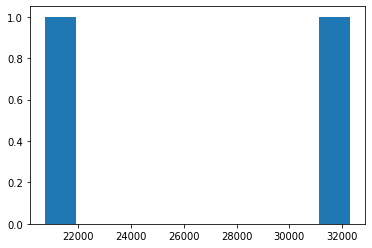

In [18]:
plts.hist(Num_Days, histtype='bar')

# Question 4b

In [19]:
Data_df = Data_df.alias('Data_df')
Average_df = Average_df.alias('Average_df')
Median_df = Median_df.alias('Median_df')

In [20]:
New_DF = Data_df.join(Average_df, col('Data_df.HotelID') == col('Average_df.HotelID'), how='inner').join(Median_df, col('Data_df.HotelID') == col('Median_df.HotelID'), how='inner')
New_DF.show(5)

+----------+--------+---+---+---+-----+-----+-----+----------+-------+-------+------------+-------+---------------+
| stay_date|num_days| r1| r3| r2| rv_1| rv_3| rv_2|as_of_date|HotelID|HotelID|Avg_num_days|HotelID|Median_num_days|
+----------+--------+---+---+---+-----+-----+-----+----------+-------+-------+------------+-------+---------------+
|2020-05-19|      -2| 13| 12| -1|762.0|704.0|-58.0|2020-05-21| x41599| x41599|         145| x41599|            138|
|2020-05-19|      -1| 13| 12| -1|762.0|704.0|-58.0|2020-05-20| x41599| x41599|         145| x41599|            138|
|2020-05-19|       0| 12| 12|  0|704.0|704.0|  0.0|2020-05-19| x41599| x41599|         145| x41599|            138|
|2020-05-19|       1| 11| 12|  1|628.0|704.0| 76.0|2020-05-18| x41599| x41599|         145| x41599|            138|
|2020-05-19|       2|  9| 12|  3|585.0|704.0|119.0|2020-05-17| x41599| x41599|         145| x41599|            138|
+----------+--------+---+---+---+-----+-----+-----+----------+-------+--

In [21]:
New_DF = New_DF.withColumn('Skewness', when(col('Avg_num_days') > col('Median_num_days'), 'Right-tailed')
                  .otherwise(when(col('Avg_num_days') < col('Median_num_days'), 'Left-tailed')
                  .otherwise('No skew')))
New_DF.show(5)

+----------+--------+---+---+---+-----+-----+-----+----------+-------+-------+------------+-------+---------------+------------+
| stay_date|num_days| r1| r3| r2| rv_1| rv_3| rv_2|as_of_date|HotelID|HotelID|Avg_num_days|HotelID|Median_num_days|    Skewness|
+----------+--------+---+---+---+-----+-----+-----+----------+-------+-------+------------+-------+---------------+------------+
|2020-05-19|      -2| 13| 12| -1|762.0|704.0|-58.0|2020-05-21| x41599| x41599|         145| x41599|            138|Right-tailed|
|2020-05-19|      -1| 13| 12| -1|762.0|704.0|-58.0|2020-05-20| x41599| x41599|         145| x41599|            138|Right-tailed|
|2020-05-19|       0| 12| 12|  0|704.0|704.0|  0.0|2020-05-19| x41599| x41599|         145| x41599|            138|Right-tailed|
|2020-05-19|       1| 11| 12|  1|628.0|704.0| 76.0|2020-05-18| x41599| x41599|         145| x41599|            138|Right-tailed|
|2020-05-19|       2|  9| 12|  3|585.0|704.0|119.0|2020-05-17| x41599| x41599|         145| x4159

In [22]:
Hotel_n_d = New_DF.select('Skewness').filter((col('Skewness') == 'Right-tailed') | (col('Skewness') == 'Left-tailed') | (col('Skewness') == 'No skew')).groupby('Skewness').agg(count('Skewness').alias('Hotels_num_days'))
Hotel_n_d.show()

+------------+---------------+
|    Skewness|Hotels_num_days|
+------------+---------------+
|     No skew|          23410|
|Right-tailed|        2398184|
+------------+---------------+



# Question 5a

In [23]:
top_10 = Data_df.select('HotelID').filter("as_of_date between '2020-06-01' and '2020-06-30'").groupBy('HotelID').agg(count('HotelID').alias('Highest_Average_r2')).orderBy(desc('Highest_Average_r2')).limit(10)
top_10.show()

+-------+------------------+
|HotelID|Highest_Average_r2|
+-------+------------------+
|  x1634|              1395|
| x64566|              1395|
| x50752|              1395|
|  x6712|              1395|
| x14690|              1395|
| x26245|              1395|
| x65683|              1395|
|  x7297|              1395|
| x65663|              1395|
| x49791|              1395|
+-------+------------------+



# Question 5b

In [25]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x1634'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [28]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x1634'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [29]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x1634'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [32]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')
R1_R2.show(5)

+-------+-----+
|r1andr2|count|
+-------+-----+
|     96|    1|
|     95|    1|
|     94|    2|
|     92|    3|
|     91|    2|
+-------+-----+
only showing top 5 rows



In [33]:
STAY_DATE = Stay_date.collect() 

In [34]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [35]:
s_d = np.resize(staydate, (277,))

In [36]:
R1_and_R2 = R1_R2.collect()

In [37]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [38]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

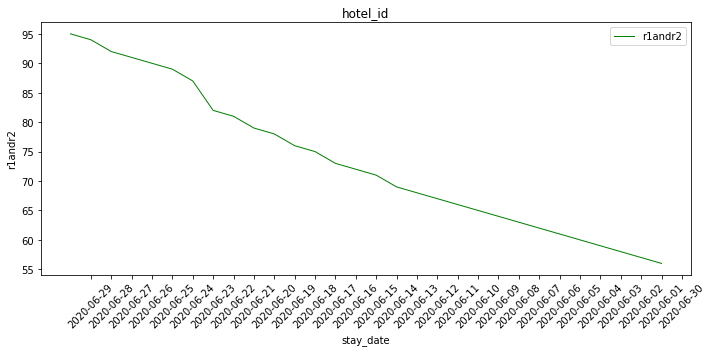

In [52]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='green', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [53]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x64566'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [54]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x64566'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [56]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x64566'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [58]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [59]:
STAY_DATE = Stay_date.collect() 

In [60]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [61]:
s_d = np.resize(staydate, (189,))

In [62]:
R1_and_R2 = R1_R2.collect()

In [63]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [64]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

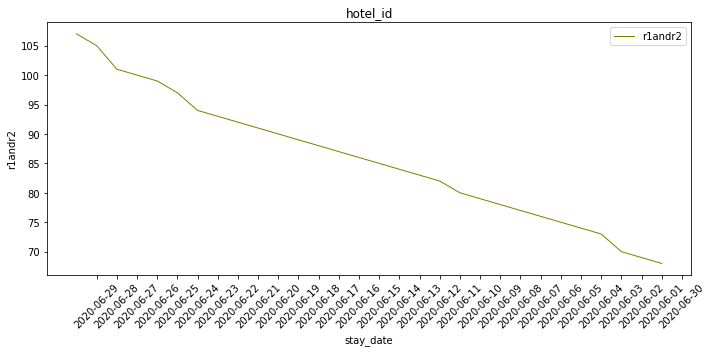

In [65]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='olive', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [66]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x50752'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [67]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x50752'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [68]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x50752'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [69]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [70]:
STAY_DATE = Stay_date.collect() 

In [71]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [72]:
s_d = np.resize(staydate, (113,))

In [74]:
R1_and_R2 = R1_R2.collect()

In [75]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [76]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

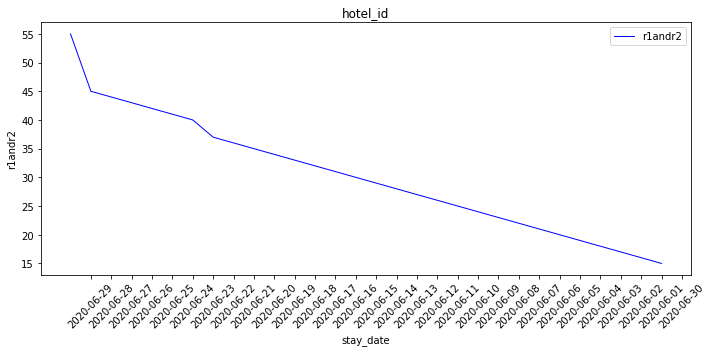

In [77]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='blue', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [78]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x6712'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [79]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x6712'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [80]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x6712'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [81]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [82]:
STAY_DATE = Stay_date.collect() 

In [83]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [84]:
s_d = np.resize(staydate, (118,))

In [85]:
R1_and_R2 = R1_R2.collect()

In [86]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [87]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

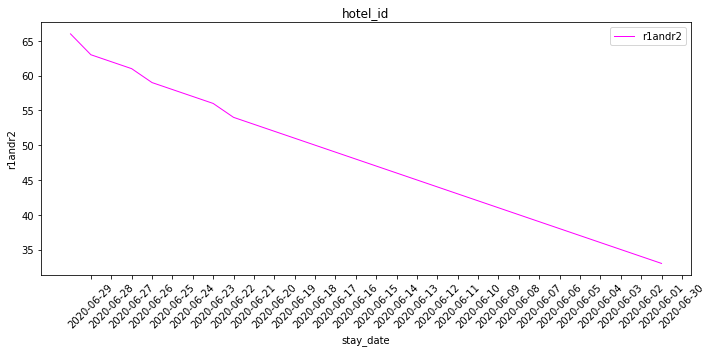

In [88]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='magenta', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [89]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x14690'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [90]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x14690'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [91]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x14690'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [92]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [93]:
STAY_DATE = Stay_date.collect() 

In [94]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [95]:
s_d = np.resize(staydate, (303,))

In [96]:
R1_and_R2 = R1_R2.collect()

In [97]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [98]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

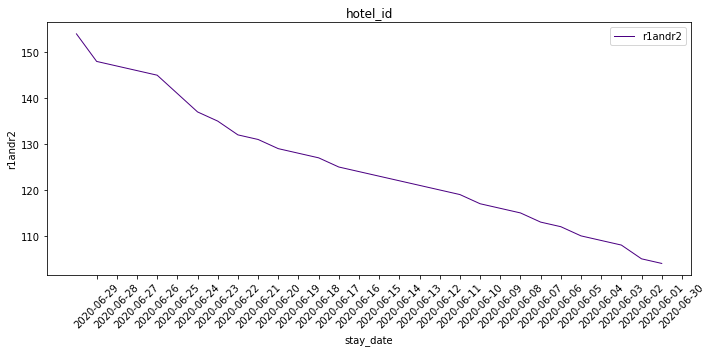

In [165]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='indigo', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [100]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x26245'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [101]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x26245'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [110]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x26245'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [111]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [112]:
STAY_DATE = Stay_date.collect() 

In [113]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [114]:
s_d = np.resize(staydate, (195,))

In [115]:
R1_and_R2 = R1_R2.collect()

In [116]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [117]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

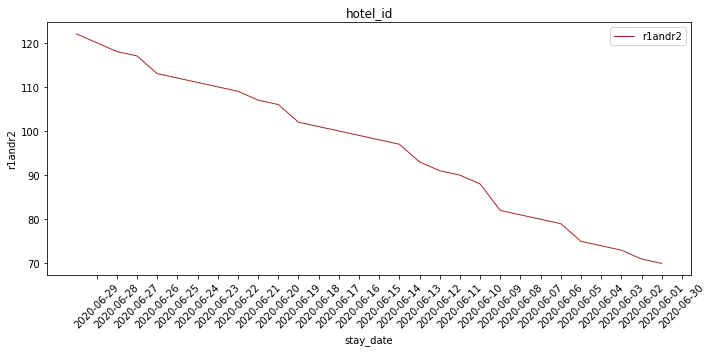

In [118]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='brown', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [119]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x65683'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [120]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x65683'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [121]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x65683'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [122]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [123]:
STAY_DATE = Stay_date.collect() 

In [124]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [125]:
s_d = np.resize(staydate, (309,))

In [126]:
R1_and_R2 = R1_R2.collect()

In [127]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [128]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

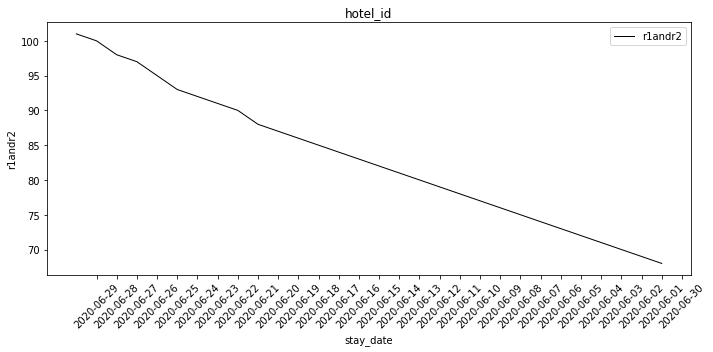

In [129]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='black', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [130]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x7297'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [131]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x7297'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [132]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x7297'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [133]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [134]:
STAY_DATE = Stay_date.collect() 

In [135]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [136]:
s_d = np.resize(staydate, (225,))

In [137]:
R1_and_R2 = R1_R2.collect()

In [138]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [139]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

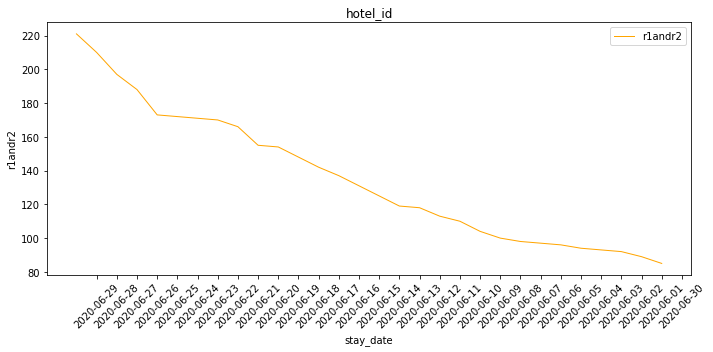

In [140]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='orange', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [141]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x65663'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [142]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x65663'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [143]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x65663'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [144]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [145]:
STAY_DATE = Stay_date.collect() 

In [146]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [147]:
s_d = np.resize(staydate, (295,))

In [148]:
R1_and_R2 = R1_R2.collect()

In [149]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [150]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

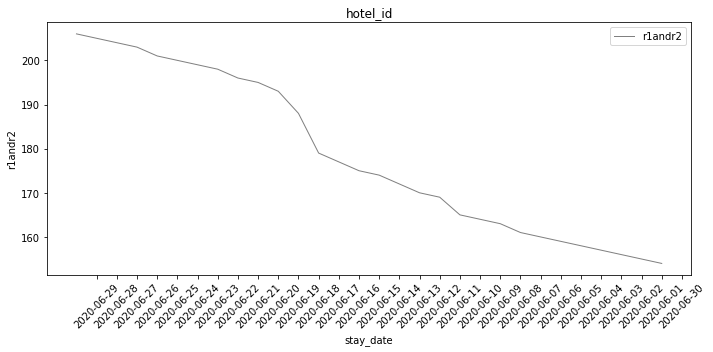

In [151]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='grey', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()

In [152]:
Stay_date = Data_df.select('stay_date').filter("stay_date between '2020-06-01' and '2020-06-30' and HotelID == 'x49791'" ).groupBy('stay_date').agg(count('stay_date').alias('count')).orderBy('stay_date', ascending=False)

In [153]:
R1 = Data_df.select('r1').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x49791'" ).groupBy('r1').agg(count('r1').alias('count')).orderBy('r1', ascending=False)

In [154]:
R2 = Data_df.select('r2').filter("as_of_date between '2020-06-01' and '2020-06-30' and HotelID == 'x49791'" ).groupBy('r2').agg(count('r2').alias('count')).orderBy('r2', ascending=False)

In [155]:
R1__R2 = R1.union(R2)
R1_R2 = R1__R2.withColumnRenamed('r1', 'r1andr2')

In [156]:
STAY_DATE = Stay_date.collect() 

In [157]:
staydate = [row['stay_date'] for row in STAY_DATE]

In [158]:
s_d = np.resize(staydate, (320,))

In [159]:
R1_and_R2 = R1_R2.collect()

In [160]:
r1_and_r2 = [row['r1andr2'] for row in R1_and_R2]

In [161]:
time_series = pd.DataFrame({'stay_date':s_d, 'r1andr2':r1_and_r2})

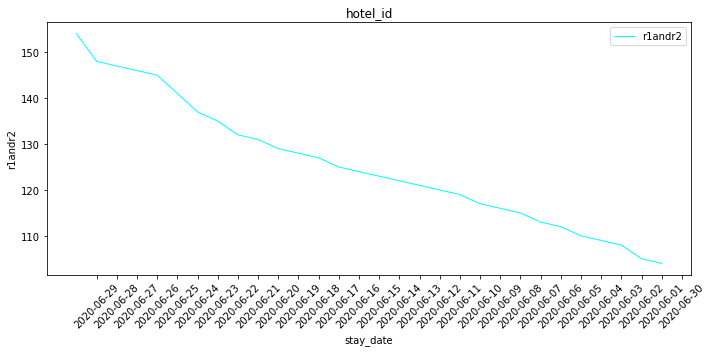

In [162]:
time_series.sort_values('r1andr2', ascending=False).reindex(range(1,31)).fillna(0).plot(kind='line', x='stay_date', y='r1andr2', color='cyan', linewidth=1, figsize=(10,5))
plts.xlabel('stay_date')
plts.ylabel('r1andr2')
plts.title('hotel_id')
plts.tight_layout()
plts.xticks(range(1,31), time_series.stay_date[1:31], rotation=45)
plts.tight_layout()
plts.show()